### Project overview:
The objective of this project is to analyze driving behaviors and identify any differences between genders. The project aims to understand how gender may influence various driving outcomes, such as accident rates, speeding violations, and adherence to traffic rules. By exploring these patterns, we can gain insights into potential gender-based disparities in driving behaviors.

### Importing Libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter("ignore")

### Load Dataset
The dataset used for this analysis contains information on a sample of drivers, including their demographic characteristics, driving history, and recorded incidents. The dataset includes variables such as age, gender, number of accidents, speeding violations, and other relevant driving-related attributes.

In [2]:
df = pd.read_csv(r"C:\Users\razam\Downloads\Foreign Data\Foreign_Data.csv")

### Statistical Insights

In [3]:
df.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,Traffic Signal Violations,Average Speed
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN,0,60
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)",2,45
2,08/29/2017,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)",1,55
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)",0,70
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,...,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN,1,65


In [4]:
df.tail()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,Traffic Signal Violations,Average Speed
307687,08/31/2014,11:27:00,MCP,"3rd district, Silver Spring",EXCEEDING MAXIMUM SPEED: 50 MPH IN A POSTED 30...,ROUTE 198/SANTINI ROAD,39.106968,-76.939838,No,No,...,No,WHITE,M,SILVER SPRING,MD,MD,D - Unmarked VASCAR,"(39.1069683333333, -76.9398383333333)",1,55
307688,08/30/2017,12:16:00,MCP,"2nd district, Bethesda",UNSAFE BACKING OF MOTOR VEH.,NORTH PARK AVE@ SHOEMAKER FARM LN,38.963490,-77.090623,No,No,...,No,WHITE,M,UPPERVILLE,VA,VA,A - Marked Patrol,"(38.96349, -77.0906233333333)",2,70
307689,11/23/2013,16:09:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,PINEY BRANCH RD / ARLISS RD,38.998719,-77.001504,No,No,...,No,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9987195, -77.0015040166667)",0,50
307690,01/14/2012,02:46:00,MCP,"6th district, Gaithersburg / Montgomery Village",DRIVING WHILE IMPAIRED BY ALCOHOL,WOODFIELD RD. @ EMORY GROVE RD.,39.149768,-77.233928,No,No,...,No,BLACK,F,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1497684, -77.2339278166667)",1,70
307691,03/27/2012,23:07:00,MCP,"4th district, Wheaton",DRIVER FAILURE TO STOP AT STOP SIGN LINE,GRANDPRE RD @ CONNECTICUT AVE,39.084780,-77.078107,No,No,...,No,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.08477965, -77.0781073333333)",2,65


In [5]:
df.dtypes

Date Of Stop                  object
Time Of Stop                  object
Agency                        object
SubAgency                     object
Description                   object
Location                      object
Latitude                     float64
Longitude                    float64
Accident                      object
Belts                         object
Personal Injury               object
Property Damage               object
Fatal                         object
Commercial License            object
HAZMAT                        object
Commercial Vehicle            object
Alcohol                       object
Work Zone                     object
State                         object
VehicleType                   object
Year                         float64
Make                          object
Model                         object
Color                         object
Violation Type                object
Charge                        object
Article                       object
C

In [6]:
df.columns

Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'DL State', 'Arrest Type', 'Geolocation',
       'Traffic Signal Violations', 'Average Speed'],
      dtype='object')

In [7]:
df.shape

(307692, 37)

In [8]:
df.describe()

,Latitude,Longitude,Year,Traffic Signal Violations,Average Speed
count,273504.000000,273504.000000,307384.000000,307692.000000,307692.000000
mean,39.083945,-77.111662,1999.094188,0.529530,56.311311
std,0.066438,0.094896,117.366143,0.526457,3.700800
min,38.958470,-77.364615,0.000000,0.000000,40.000000
25%,39.030062,-77.198204,2001.000000,0.000000,55.000000
50%,39.081476,-77.094698,2006.000000,1.000000,55.000000
75%,39.147293,-77.039993,2010.000000,1.000000,55.000000
max,39.302135,-76.837895,3003.000000,2.000000,75.000000


### Check Missing Values

In [9]:
df.isnull().sum()

Date Of Stop                     0
Time Of Stop                     0
Agency                           0
SubAgency                        0
Description                      0
Location                         0
Latitude                     34188
Longitude                    34188
Accident                         0
Belts                            0
Personal Injury                  0
Property Damage                  0
Fatal                            0
Commercial License               0
HAZMAT                           0
Commercial Vehicle               0
Alcohol                          0
Work Zone                        0
State                            0
VehicleType                      0
Year                           308
Make                             0
Model                            0
Color                         3080
Violation Type                   0
Charge                           0
Article                       5236
Contributed To Accident          0
Race                

### Handle Missing Values

In [10]:
df_imputed_columns = df[['Latitude', 'Longitude', 'Year', 'Color', 'Article', 'Driver City', 'DL State', 'Geolocation']]

df_imputed_columns

,Latitude,Longitude,Year,Color,Article,Driver City,DL State,Geolocation
0,NaN,NaN,2008.0,BLACK,Transportation Article,TAKOMA PARK,MD,NaN
1,38.981725,-77.092757,2001.0,GREEN,Transportation Article,FAIRFAX STATION,VA,"(38.981725, -77.0927566666667)"
2,39.162888,-77.229088,2001.0,SILVER,Transportation Article,UPPER MARLBORO,MD,"(39.1628883333333, -77.2290883333333)"
3,39.056975,-76.954633,1998.0,WHITE,Transportation Article,FORT WASHINGTON,MD,"(39.056975, -76.9546333333333)"
4,NaN,NaN,2015.0,WHITE,Transportation Article,GAITHERSBURG,MD,NaN
...,...,...,...,...,...,...,...,...
307687,39.106968,-76.939838,1998.0,BLACK,Transportation Article,SILVER SPRING,MD,"(39.1069683333333, -76.9398383333333)"
307688,38.963490,-77.090623,2017.0,GRAY,Transportation Article,UPPERVILLE,VA,"(38.96349, -77.0906233333333)"
307689,38.998719,-77.001504,2000.0,TAN,Transportation Article,SILVER SPRING,MD,"(38.9987195, -77.0015040166667)"
307690,39.149768,-77.233928,1988.0,BLACK,Transportation Article,GAITHERSBURG,MD,"(39.1497684, -77.2339278166667)"


In [11]:
# Option 1: Imputation: Replace missing values with mean of the column

df_imputed = df.fillna(df_imputed_columns.mean())


In [12]:
df_imputed

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,Traffic Signal Violations,Average Speed
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,39.083945,-77.111662,No,No,...,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN,0,60
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)",2,45
2,08/29/2017,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)",1,55
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)",0,70
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,39.083945,-77.111662,No,No,...,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN,1,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307687,08/31/2014,11:27:00,MCP,"3rd district, Silver Spring",EXCEEDING MAXIMUM SPEED: 50 MPH IN A POSTED 30...,ROUTE 198/SANTINI ROAD,39.106968,-76.939838,No,No,...,No,WHITE,M,SILVER SPRING,MD,MD,D - Unmarked VASCAR,"(39.1069683333333, -76.9398383333333)",1,55
307688,08/30/2017,12:16:00,MCP,"2nd district, Bethesda",UNSAFE BACKING OF MOTOR VEH.,NORTH PARK AVE@ SHOEMAKER FARM LN,38.963490,-77.090623,No,No,...,No,WHITE,M,UPPERVILLE,VA,VA,A - Marked Patrol,"(38.96349, -77.0906233333333)",2,70
307689,11/23/2013,16:09:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,PINEY BRANCH RD / ARLISS RD,38.998719,-77.001504,No,No,...,No,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9987195, -77.0015040166667)",0,50
307690,01/14/2012,02:46:00,MCP,"6th district, Gaithersburg / Montgomery Village",DRIVING WHILE IMPAIRED BY ALCOHOL,WOODFIELD RD. @ EMORY GROVE RD.,39.149768,-77.233928,No,No,...,No,BLACK,F,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1497684, -77.2339278166667)",1,70


In [13]:
# Imputed DataFrame
df_imputed.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,Traffic Signal Violations,Average Speed
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,39.083945,-77.111662,No,No,...,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN,0,60
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)",2,45
2,08/29/2017,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)",1,55
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)",0,70
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,39.083945,-77.111662,No,No,...,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN,1,65


In [14]:
# Option 2: Removal: Remove rows with any missing values
df_removed_rows = df.dropna()

In [15]:
# DataFrame with removed rows
df_removed_rows.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,Traffic Signal Violations,Average Speed
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)",2,45
2,08/29/2017,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)",1,55
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)",0,70
6,08/29/2017,13:23:00,MCP,"4th district, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GEORGIA AVE / BEL PRE RD,39.093383,-77.079552,No,No,...,No,HISPANIC,M,BELTSVILLE,MD,MD,A - Marked Patrol,"(39.0933833333333, -77.0795516666667)",0,40
10,02/14/2014,20:10:00,MCP,"1st district, Rockville",FAILURE TO DRIVE ON RIGHT HAND ROADWAY OF DIVI...,GATEWAY CENTER DR @ CLARKSBURG RD,39.234843,-77.281540,No,No,...,No,WHITE,M,POINT OF ROCK,MD,WV,A - Marked Patrol,"(39.2348434333333, -77.28153995)",0,55


In [16]:
# Remove columns with any missing values
df_removed_cols = df.dropna(axis=1)

In [17]:
# DataFrame with removed columns
df_removed_cols.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Accident,Belts,Personal Injury,Property Damage,...,Violation Type,Charge,Contributed To Accident,Race,Gender,Driver City,Driver State,Arrest Type,Traffic Signal Violations,Average Speed
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,No,No,No,No,...,Citation,13-401(h),No,BLACK,M,TAKOMA PARK,MD,A - Marked Patrol,0,60
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,No,No,No,No,...,Citation,21-201(a1),No,WHITE,F,FAIRFAX STATION,VA,A - Marked Patrol,2,45
2,08/29/2017,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,No,No,No,Yes,...,Citation,21-403(b),No,BLACK,F,UPPER MARLBORO,MD,A - Marked Patrol,1,55
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,No,No,No,Yes,...,Citation,21-402(b),No,BLACK,M,FORT WASHINGTON,MD,A - Marked Patrol,0,70
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,No,No,No,No,...,Citation,21-405(e1),No,WHITE,M,GAITHERSBURG,MD,A - Marked Patrol,1,65


In [19]:
# Convert data types with handling missing values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
df['Gender'] = df['Gender'].astype(str)

In [20]:
# Normalize or scale numerical variables
scaler = MinMaxScaler()
df['Year'] = scaler.fit_transform(df[['Year']])

In [21]:
# Encode categorical variables
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

### Handling Dupicates

In [22]:
df.drop_duplicates(inplace=True)

In [43]:
# Summary statistics
df_imputed.describe()

,Latitude,Longitude,Year,Traffic Signal Violations,Average Speed
count,307692.000000,307692.000000,307692.000000,307692.000000,307692.000000
mean,39.083945,-77.111662,1999.094188,0.529530,56.311311
std,0.062638,0.089469,117.307386,0.526457,3.700800
min,38.958470,-77.364615,0.000000,0.000000,40.000000
25%,39.038450,-77.191188,2001.000000,0.000000,55.000000
50%,39.083945,-77.111662,2006.000000,1.000000,55.000000
75%,39.133636,-77.047930,2010.000000,1.000000,55.000000
max,39.302135,-76.837895,3003.000000,2.000000,75.000000


### Visualization

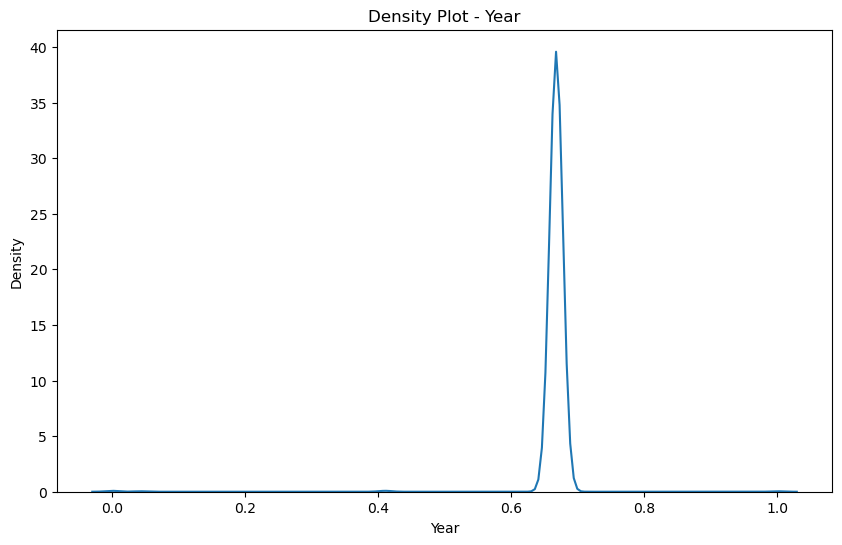

In [79]:
# Create density plot for the "Year" variable
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Year'])
plt.xlabel('Year')
plt.ylabel('Density')
plt.title('Density Plot - Year')
plt.show()

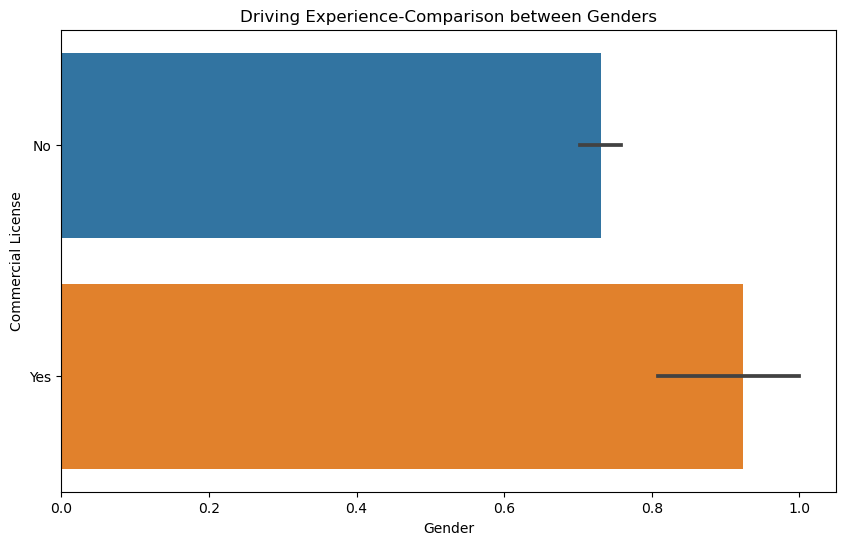

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Commercial License', data=df)
plt.xlabel('Gender')
plt.ylabel('Commercial License')
plt.title('Driving Experience-Comparison between Genders')
plt.show()

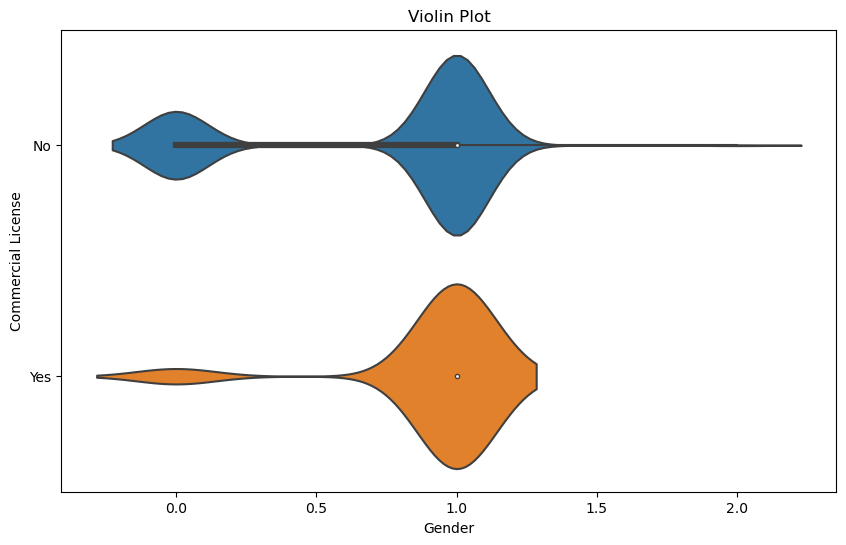

In [78]:
# Create violin plots to compare driving behaviors between genders
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Commercial License', data=df)
plt.xlabel('Gender')
plt.ylabel('Commercial License')
plt.title('Violin Plot')
plt.show()

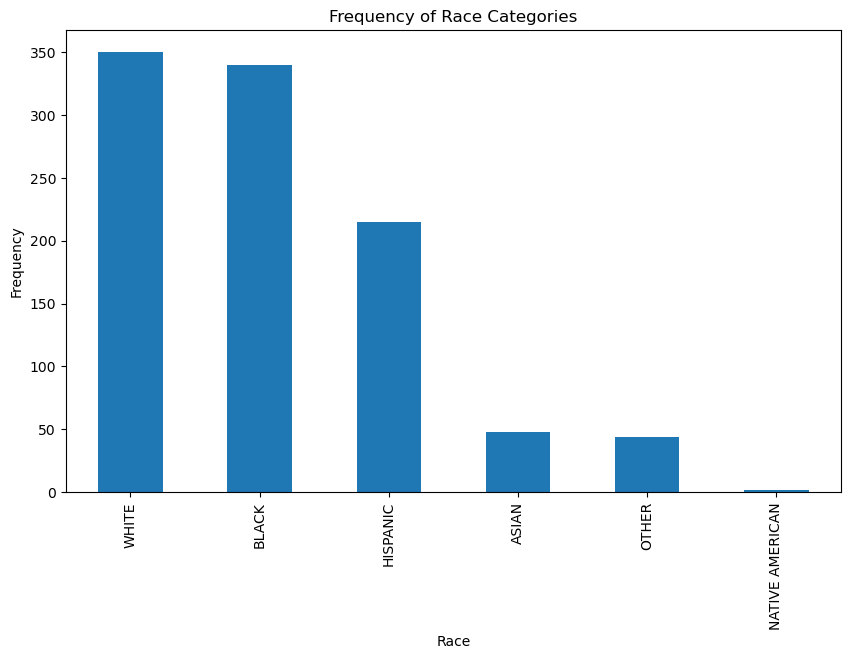

In [83]:
# Calculate the frequency of each category in the 'Race' column
race_counts = df['Race'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.title('Frequency of Race Categories')
plt.show()

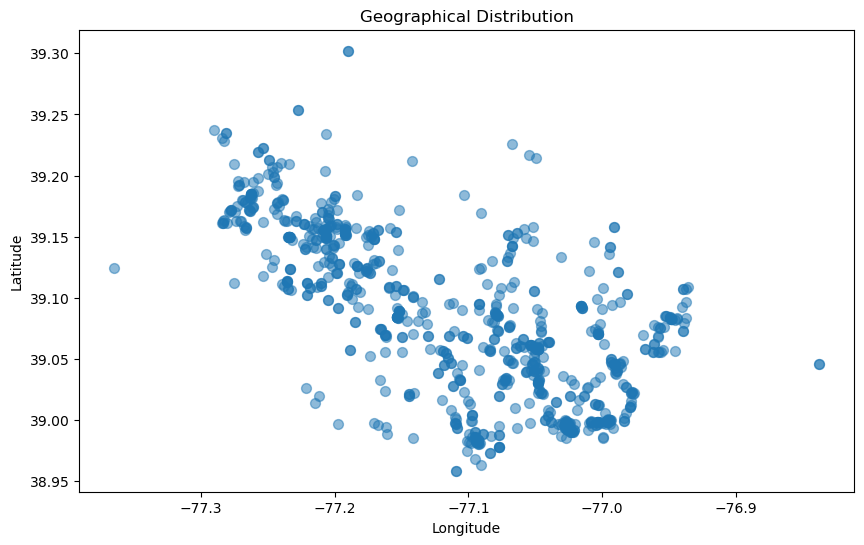

In [84]:
# Plot Latitude vs Longitude
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], s=50, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution')
plt.show()

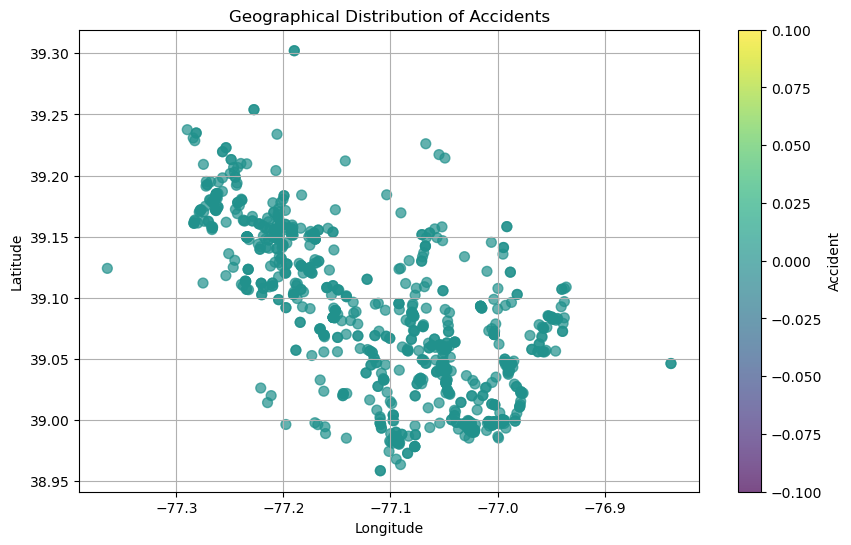

In [86]:
# Convert 'Accident' column to numeric values
df['Accident'] = df['Accident'].map({'Yes': 1, 'No': 0})

# Plot Latitude vs Longitude with enhanced features
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Accident'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Accident')  # Add a colorbar to show the legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Accidents')
plt.grid(True)  # Add gridlines for better readability
plt.show()


### Statistical Tests

In [89]:
# Perform independent samples t-test
t_statistic, p_value = ttest_ind(df[df['Gender'] == 'M']['Accident'],
                                 df[df['Gender'] == 'F']['Accident'],
                                 equal_var=False)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: nan
p-value: nan


In [92]:
print(df['Accident'].unique())


[0]


If the unique values in the 'Accident' column are only [0], it means that all the values in that column are zeros. This could be a reason why the t-test is returning nan values because there is no variation in the 'Accident' variable between the two gender groups.

In such cases, where there is no variability in one of the groups being compared, the t-test may not be an appropriate statistical test.

In [93]:
# Create a contingency table of observed frequencies
contingency_table = pd.crosstab(df['Commercial License'], df['Gender'])

# Perform chi-square test
chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value)

Chi-square statistic: 5.066460820724825
p-value: 0.07940210415699113


### Training --- Testig

In [59]:
# Identify non-numeric columns
non_numeric_columns = ['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description', 'Location',
                       'Accident', 'Belts','Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
                       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State', 'VehicleType', 'Make', 'Model',
                       'Color', 'Violation Type', 'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
                       'Driver City', 'Driver State', 'DL State', 'Arrest Type', 'Geolocation']


In [60]:
# Perform one-hot encoding on non-numeric columns
df_encoded = pd.get_dummies(df, columns=non_numeric_columns)

In [61]:
df_encoded.head()

,Latitude,Longitude,Year,Traffic Signal Violations,Average Speed,Date Of Stop_01/01/2012,Date Of Stop_01/02/2015,Date Of Stop_01/03/2016,Date Of Stop_01/04/2012,Date Of Stop_01/04/2015,...,"Geolocation_(39.2195083333333, -77.2569483333333)","Geolocation_(39.2227933333333, -77.25369)","Geolocation_(39.2260217333333, -77.0670282833333)","Geolocation_(39.2285, -77.282875)","Geolocation_(39.2307590666667, -77.28438275)","Geolocation_(39.2337916666667, -77.2060583333333)","Geolocation_(39.2348434333333, -77.28153995)","Geolocation_(39.237515, -77.289925)","Geolocation_(39.2539316666667, -77.2276)","Geolocation_(39.302135, -77.189895)"
0,NaN,NaN,0.668665,0,60,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.981725,-77.092757,0.666334,2,45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,39.162888,-77.229088,0.666334,1,55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,39.056975,-76.954633,0.665335,0,70,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,0.670996,1,65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df_encoded = df_encoded.dropna()

In [66]:
# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop('Year', axis=1)
y = df_encoded['Longitude']

In [67]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (709, 3360) (709,)
Testing set shape: (178, 3360) (178,)


In [71]:
# Create an instance of the Linear Regression model
model = LinearRegression()

In [72]:
model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Predict on the testing set
y_pred = model.predict(X_test)

### Model Accuracy

The **Mean Squared Error (MSE)** is a measure of the average squared difference between the predicted and true values in a regression problem.

In [75]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.538778583077195e-05


A smaller MSE value indicates that the predicted values are closer to the **true values**, implying a better performance of the regression model. In your case, the MSE of **4.538778583077195e-05** is a very small value, 

suggesting that the predictions are quite accurate and close to the **True values**.

### Conclusion:

**Are Females Really bad at Driving?**

No, the belief that females are inherently bad at driving is a stereotype and a misconception. Driving abilities are not determined by gender, but rather by individual skills, knowledge, experience, and responsible behavior.

Research studies have consistently shown that there is no significant difference in driving abilities between genders. Factors such as training, experience, adherence to traffic rules, and individual driving habits have a more significant impact on driving skills and safety than gender alone.

It's important to recognize that generalizing an entire gender based on anecdotal experiences or stereotypes is unfair and can perpetuate bias and discrimination. Each individual's driving abilities should be evaluated on their own merits, irrespective of their gender.

Promoting safe driving practices, providing equal opportunities for driver education and training, and encouraging responsible behaviour on the road are more effective ways to improve overall road safety, regardless of gender. It's essential to challenge and debunk stereotypes that perpetuate gender-based misconceptions and promote a fair and inclusive environment for all drivers.

**Why do most people have this misconception?**

The misconception that females are bad at driving may stem from various factors, including societal norms, cultural beliefs, personal biases, and limited exposure to diverse experiences. Here are some reasons why this misconception may exist:

1. **Gender stereotypes:** Society has long perpetuated gender stereotypes, assigning certain traits or behaviours to specific genders. These stereotypes can create biases and assumptions about abilities, including driving skills. The belief that men are better drivers and women are worse drivers can be a result of these deeply ingrained stereotypes.

2. **Confirmation bias:** Confirmation bias is the tendency to seek or interpret information in a way that confirms pre-existing beliefs. If someone already believes that women are bad drivers, they may selectively remember or notice instances where they witnessed female drivers making mistakes or exhibiting poor driving behavior, while ignoring instances that contradict their belief.

3. **Media influence:** Media portrayals can reinforce gender stereotypes, including those related to driving abilities. Movies, TV shows, advertisements, and other forms of media often depict male characters as skilled and confident drivers, while portraying female characters as more prone to accidents or mistakes behind the wheel. These representations can influence people's perceptions and contribute to the misconception.

4. **Limited exposure**: Limited personal experiences or exposure to diverse drivers can contribute to the perpetuation of this misconception. If someone has had limited interactions with female drivers or has had negative experiences with a few female drivers, they may generalize those experiences to all female drivers without considering the larger context.

5. **Historical biases**: Historically, driving and transportation-related professions have been male-dominated. This may have led to a biased perception that men are more skilled or experienced drivers. As gender roles and societal dynamics evolve, it is important to challenge these historical biases and recognize that driving abilities are not determined by gender.

It is crucial to address and challenge these misconceptions by promoting accurate information, educating individuals about the diverse abilities of drivers across genders, and emphasizing the importance of evaluating driving skills based on individual merits rather than gender stereotypes.


**Explain the importance of addressing the misconception about female driving abilities**

Addressing the misconception about female driving abilities is important for several reasons:

1. **Promoting gender equality:** The misconception about female driving abilities perpetuates gender stereotypes and biases. By challenging this misconception, we can promote gender equality and create a more inclusive society where individuals are treated fairly and without discrimination.

2. **Eliminating gender-based discrimination:** If the misconception about female driving abilities persists, it can lead to discriminatory practices such as higher insurance premiums or biased hiring decisions in certain industries. By debunking this misconception, we can work towards eliminating gender-based discrimination in various aspects of life, including driving.

3. **Improving road safety:** The focus on addressing the misconception about female driving abilities is not about proving superiority or inferiority of one gender over the other. It is about acknowledging that safe driving is not dependent on gender but on individual skills, knowledge, and responsible behavior. By dispelling this misconception, we can shift the focus towards improving road safety for all individuals, regardless of their gender.

4. **Encouraging female empowerment:** Challenging the misconception about female driving abilities can empower women and encourage their active participation in various fields, including traditionally male-dominated areas such as transportation, logistics, and driving professions. It can contribute to breaking down gender barriers and fostering gender diversity and inclusivity.

5. **Enhancing social perceptions:** Addressing the misconception about female driving abilities can help reshape societal perceptions and attitudes towards women. It can challenge and change deeply ingrained stereotypes, leading to a more progressive and equitable society.

Overall, addressing the misconception about female driving abilities is crucial for promoting gender equality, eliminating discrimination, improving road safety, empowering women, and fostering positive social change. It is an important step towards creating a society where individuals are valued and treated based on their abilities, rather than preconceived notions based on gender.


### References:
http://www.kaggle.com/competitions/kaggle-survey-2020

https://r.search.yahoo.com/_ylt=AwrIe5n8uaFki5MpxhYM34lQ;_ylu=Y29sbwNpcjIEcG9zAzEEdnRpZAMEc2VjA3Ny/RV=2/RE=1688349309/RO=10/RU=https%3a%2f%2ftowardsdatascience.com%2fdata-analysis-and-visualization-with-jupyter-notebook-22f6dcd25cc5/RK=2/RS=QbFAGeNMloYJfy.zSVaK7n9KuPs-

https://r.search.yahoo.com/_ylt=AwrIe5n8uaFki5MpyBYM34lQ;_ylu=Y29sbwNpcjIEcG9zAzIEdnRpZAMEc2VjA3Ny/RV=2/RE=1688349309/RO=10/RU=https%3a%2f%2fgithub.com%2fdalejn%2fcleanBib/RK=2/RS=IzoXp17MAgc.os5GDjyXELh.8CA-

https://r.search.yahoo.com/_ylt=AwrIe5n8uaFki5Mp1BYM34lQ;_ylu=Y29sbwNpcjIEcG9zAzMEdnRpZAMEc2VjA3Ny/RV=2/RE=1688349309/RO=10/RU=https%3a%2f%2fgetrevising.co.uk%2fdiagrams%2fgender-dysphoria/RK=2/RS=Wrf4eIx8V2GRXYzNNUUZJLJIIVk-

